## <span style="color:coral"> Predicting Ames Housing Prices with Regression
    
<span style="color:teal">**Background** </span> <br> 

House prices predictions are useful for *homebuyers* (primary stakeholder) plan their purchase for an ideal house and finances to buy a house. Being able to identify features which the value of the house is sensitive to, they may be in a better position to negotiate price. In addition, house price predictions are also beneficial for *homeowners* (secondary stakeholder) decide how they may want to renovate their houses to improve its marketability and sale price. 

<span style="color:teal"> **Problem Statement** </span> <br> 
    
- How may homebuyers in Ames identify houses which have great appreciation value? <br>
- How may homesellers in Ames improve the values of their house? <br>


<span style="color:teal"> **Objective** <br> 

With a [Ames Housing Dataset](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data) from Kaggle, which consists of 2051 sold houses in Ames, where each of these houses have 80 features that we will leverage upon to find patterns and correlations, we want to -</span>
    

    
- **identify features** which significantly affect housing prices
- **accurately** predict housing prices using those features
- build a **generalizable^** regression model to accurately predict housing prices <br>(i.e. ^model should be able to adapt to different sets of test data, and predict housing prices with a decent accuracy)
- identify features of a house which affects its value


<span style="color:teal"> **Evaluation** </span> of model performance by -
    
    
1. coefficient of discrimination ($R^2$) 
2. root-mean-squared-error (RMSE)



### <span style="color:royalblue"> **1. Importing the Libraries & Datasets**

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet

raw_df = pd.read_csv("./datasets/train.csv")
test_df = pd.read_csv("./datasets/test.csv")

print(raw_df.shape)

(2051, 81)


### <span style="color:royalblue"> **2. Understanding the Dataset**
<span style="color:royalblue"> **2a. Data Inspection**

In [2]:
[print (i) for i in raw_df.columns]

Id
PID
MS SubClass
MS Zoning
Lot Frontage
Lot Area
Street
Alley
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style
Overall Qual
Overall Cond
Year Built
Year Remod/Add
Roof Style
Roof Matl
Exterior 1st
Exterior 2nd
Mas Vnr Type
Mas Vnr Area
Exter Qual
Exter Cond
Foundation
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin SF 1
BsmtFin Type 2
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
Heating
Heating QC
Central Air
Electrical
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Bsmt Full Bath
Bsmt Half Bath
Full Bath
Half Bath
Bedroom AbvGr
Kitchen AbvGr
Kitchen Qual
TotRms AbvGrd
Functional
Fireplaces
Fireplace Qu
Garage Type
Garage Yr Blt
Garage Finish
Garage Cars
Garage Area
Garage Qual
Garage Cond
Paved Drive
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Pool QC
Fence
Misc Feature
Misc Val
Mo Sold
Yr Sold
Sale Type
SalePrice


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [5]:
# Dictionary showing the values for each categorial/nominal columns

lst1 = []
lst2 = []

for i in raw_df.columns:
    if raw_df[i].dtype == object and len(list(raw_df[i].value_counts().index))<10:
        lst1.append(i)
        lst2.append(list(raw_df[i].value_counts().index))
        col_dict = zip(lst1,lst2)
        
raw_df_map = {k: v for k, v in col_dict}
raw_df_map

{'MS Zoning': ['RL', 'RM', 'FV', 'C (all)', 'RH', 'A (agr)', 'I (all)'],
 'Street': ['Pave', 'Grvl'],
 'Alley': ['Grvl', 'Pave'],
 'Lot Shape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'Land Contour': ['Lvl', 'HLS', 'Bnk', 'Low'],
 'Utilities': ['AllPub', 'NoSeWa', 'NoSewr'],
 'Lot Config': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
 'Land Slope': ['Gtl', 'Mod', 'Sev'],
 'Condition 1': ['Norm',
  'Feedr',
  'Artery',
  'RRAn',
  'PosN',
  'RRAe',
  'PosA',
  'RRNn',
  'RRNe'],
 'Condition 2': ['Norm',
  'Feedr',
  'Artery',
  'PosA',
  'PosN',
  'RRNn',
  'RRAe',
  'RRAn'],
 'Bldg Type': ['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon'],
 'House Style': ['1Story',
  '2Story',
  '1.5Fin',
  'SLvl',
  'SFoyer',
  '2.5Unf',
  '1.5Unf',
  '2.5Fin'],
 'Roof Style': ['Gable', 'Hip', 'Flat', 'Gambrel', 'Mansard', 'Shed'],
 'Roof Matl': ['CompShg',
  'Tar&Grv',
  'WdShngl',
  'WdShake',
  'ClyTile',
  'Membran'],
 'Mas Vnr Type': ['None', 'BrkFace', 'Stone', 'BrkCmn'],
 'Exter Qual': ['TA', 'Gd', 'Ex'

In [6]:
# putting our target variable (SalePrice) at position 0 for easier reference
df = raw_df
df.set_index('Id', inplace=True)

sp_col = df.pop("SalePrice")

df.insert(0, 'SalePrice', sp_col)
df.head(3).T

Id,109,544,153
SalePrice,130500,220000,109000
PID,533352170,531379050,535304180
MS SubClass,60,60,20
MS Zoning,RL,RL,RL
Lot Frontage,NaN,43.0,68.0
Lot Area,13517,11492,7922
Street,Pave,Pave,Pave
Alley,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg
Land Contour,Lvl,Lvl,Lvl


<span style="color:royalblue"> **2b. Our Baseline Model** </span><br>
We will create a baseline prediction result to use it as a point for comparison for the model we will create later

In [7]:
raw_df = raw_df.fillna(0)

features = [i for i in raw_df._get_numeric_data().columns if i !='SalePrice']
features
base_X = raw_df[features]
base_y = raw_df['SalePrice']

lr = LinearRegression()
lr.fit(base_X, base_y)
base_y_pred = lr.predict(base_X)

print(f'Baseline r2 score: {lr.score(base_X, base_y)}')
print(f'Baseline RMSE: {np.sqrt(mean_squared_error(base_y, base_y_pred))}')

Baseline r2 score: 0.8408721476525227
Baseline RMSE: 31609.23047447969


### <span style="color:royalblue"> **3. Data Cleaning**
<span style="color:royalblue"> **3a. Dropping Columns (no relation)**

We want to delete the columns have no relation to the sale price, namely: 
1. `PID` (Parcel identification number) <br>
   *Since PID is a just a unique code that has no meaning in the context of our house price prediction, we will proceed to drop it.*

2. `Sale Type` (Type of sale) <br>
    *For Sale Type, we will check if it has indeed no impact on SalePrice*

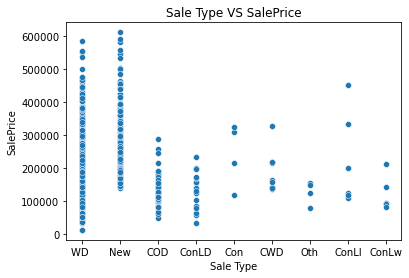

In [8]:
plt.title('Sale Type VS SalePrice')
sns.scatterplot(data=df, x='Sale Type', y='SalePrice');

In [9]:
# No relationship, we can conclude that type of sale will not have any impact of SalePrice
# Proceed to drop Parcel ID & Type of sale 
df.drop(['PID', 'Sale Type'], axis=1, inplace=True)
df.shape

(2051, 78)

<span style="color:royalblue"> **3b. Replacing "Year" Columns**
    
Homebuyers will be more interested in the age of the house they are buying, rather than the year it was built/remodelled. Age of house will have more direct influence on the house value, as compared to the year it was built. <br>
Instead of using the year a house was built, we will take the difference between the year built and year sold, to find the age of house (`AgeSold`), at the point of in time when it was sold. The same logic applies for date of remodeling or addition, hence, we have replaced it with Age Remodeled (`AgeRemod`).

In [10]:
df.filter(regex=r'(Year|Yr)').head(3)

,Year Built,Year Remod/Add,Garage Yr Blt,Yr Sold
Id,,,,
109,1976,2005,1976.0,2010
544,1996,1997,1997.0,2009
153,1953,2007,1953.0,2010


In [11]:
# New columns: (i) Age built, (ii) Age remodelled, of the house (in years) at the point when it was sold
df['AgeSold'] = df['Yr Sold'] - df['Year Built']
df['AgeRemod'] = df['Yr Sold'] - df['Year Remod/Add']

df[df['AgeSold']<0] = 0
df[df['AgeRemod']<0] = 0

# Now we no longer need the Year Built and Remodelled
df.drop(labels=['Year Built','Year Remod/Add'], axis=1, inplace=True)
print(df.shape)
df.head(3)

(2051, 78)


,SalePrice,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,AgeSold,AgeRemod
Id,,,,,,,,,,,,,,,,,,,,,
109,130500,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,34,5
544,220000,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,13,12
153,109000,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,57,3


<span style="color:royalblue"> **3c. Null Values**

In [12]:
null_col = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['null_count'])
num_col_null = null_col[null_col['null_count']!= 0].shape[0]
print(f'{num_col_null} Columns with Null Values: \n')
null_col[null_col['null_count']!= 0]

26 Columns with Null Values: 



,null_count
Pool QC,2040
Misc Feature,1985
Alley,1909
Fence,1649
Fireplace Qu,1000
Lot Frontage,330
Garage Qual,114
Garage Finish,114
Garage Yr Blt,114
Garage Cond,114


In [13]:
print('Categorial Columns in Dataset: \n')
for i in df.columns:
    if df[i].dtype == object:
        print(i)
        print(df[i].unique())
        print('\n')

Categorial Columns in Dataset: 

MS Zoning
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)' 0]


Street
['Pave' 'Grvl' 0]


Alley
[nan 'Pave' 'Grvl' 0]


Lot Shape
['IR1' 'Reg' 'IR2' 'IR3' 0]


Land Contour
['Lvl' 'HLS' 'Bnk' 'Low' 0]


Utilities
['AllPub' 'NoSeWa' 'NoSewr' 0]


Lot Config
['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3' 0]


Land Slope
['Gtl' 'Sev' 'Mod' 0]


Neighborhood
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk' 0]


Condition 1
['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn' 0]


Condition 2
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 0 'RRAn']


Bldg Type
['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex' 0]


House Style
['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf' 0]


Roof Style
['Gable' 'Hip' '

<span style="color:royalblue"> **3c(i). Null Values in Categorial Columns** </span><br>

- $\forall$ Columns with null because $\not\exists$ categorical features (or not present) → imputed with a standard string `NA`<br>

In [14]:
for i in df.columns:
    if df[i].dtypes == object:
        df[i].replace(np.nan, "NA",inplace=True)
    #elif df[i].dtypes == 'int64' or df[i].dtypes == float:
        #df[i].replace(np.nan, 0,inplace=True)

null_col = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['null_count'])
num_col_null = null_col[null_col['null_count']!= 0].shape[0]
num_col_null = null_col[null_col['null_count']!= 0].shape[0]
print(f'After Cleaning Caterogorial Null Columns, {num_col_null} Columns with Null Values: \n')
null_col[null_col['null_count']!= 0]

After Cleaning Caterogorial Null Columns, 11 Columns with Null Values: 



,null_count
Lot Frontage,330
Garage Yr Blt,114
Mas Vnr Area,22
Bsmt Full Bath,2
Bsmt Half Bath,2
BsmtFin SF 2,1
Garage Cars,1
Garage Area,1
BsmtFin SF 1,1
Bsmt Unf SF,1


<span style="color:royalblue"> **3c(ii). Null Values in Lot Frontage** </span><br>
Lot Frontage: Linear feet of street connected to property

In [15]:
non_null_lot_frontage_df = df[df['Lot Frontage'].isnull() == False] # Temporarily exclude null in lot frontage
print(f'Correlation Coeff of Lot Frontage and SalePrice:')
np.corrcoef(non_null_lot_frontage_df['Lot Frontage'], non_null_lot_frontage_df["SalePrice"])[0][1]

Correlation Coeff of Lot Frontage and SalePrice:


0.3465249501556944

In [16]:
# Not much correlation (0.34) between non-null Lot Frontage and SalePrice, we remove Lot Frontage Column
df.drop(labels=['Lot Frontage'], axis=1, inplace=True)

<span style="color:royalblue"> **3c(iii). Null Values related to Basement** </span><br>
- $\forall$ Columns with null because $\not\exists$ basement, which we have imputed with a standard string `NA` previously <br>
- Related numerical features → imputed with 0<br>

In [17]:
# Cleaning Basement Columns
df_bsmt = df.filter(regex= 'Bsmt')

df.loc[df_bsmt['Bsmt Qual']=='NA','Bsmt Full Bath'] = 0
df.loc[df_bsmt['Bsmt Qual']=='NA','Bsmt Half Bath'] = 0
df.loc[df_bsmt['Bsmt Qual']=='NA','BsmtFin SF 1'] = 0
df.loc[df_bsmt['Bsmt Qual']=='NA','BsmtFin SF 2'] = 0
df.loc[df_bsmt['Bsmt Qual']=='NA','Bsmt Unf SF'] = 0
df.loc[df_bsmt['Bsmt Qual']=='NA','Total Bsmt SF'] = 0

df_bsmt = df.filter(regex= 'Bsmt')
df_bsmt.isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

<span style="color:royalblue"> **3c(iv). Null Values related to Garage** </span><br>
- $\forall$ Columns with null because $\not\exists$ basement, which we have imputed with a standard string `NA` previously <br>
- Related numerical features → imputed with 0<br>
- Related categorial features → imputed with `NA`<br>

In [18]:
# Cleaning Garage Columns
df_gar = df.filter(regex= 'Garage')
df_gar['Garage Finish'].value_counts()

Unf    848
RFn    579
Fin    508
NA     114
0        2
Name: Garage Finish, dtype: int64

In [19]:
# No garage => 'Garage Yr Blt will be 0
df.loc[df['Garage Finish']=='NA','Garage Yr Blt'] = 0
df_gar = df.filter(regex= 'Garage')
df_gar_null = df_gar[df_gar['Garage Area'].isnull()]
df_gar_null

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
Id,,,,,,,
2237,Detchd,0.0,NA,NaN,NaN,NA,NA


We realise there is still a house $\exists$ garage, but its other related features are 0 or null. <br>
Since it is only a single observation, we may either i. drop row or ii. impute null - here, shall do the latter in hopes for brownie points
- Related numerical features → imputed with `mean`
- Related categorial features → imputed with `mode`

In [20]:
for i in list(df_gar_null.index):
    print(i)
    df.loc[i , 'Garage Yr Blt'] = round(df_gar['Garage Yr Blt'].mean(),0)
    df.loc[i , 'Garage Cars'] = round(df_gar['Garage Cars'].mean(),0)
    df.loc[i , 'Garage Area'] = round(df_gar['Garage Area'].mean(),0)
    df.loc[i , 'Garage Finish'] = df_gar['Garage Finish'].mode()[0]
    df.loc[i , 'Garage Qual'] = df_gar['Garage Qual'].mode()[0]
    df.loc[i , 'Garage Cond'] = df_gar['Garage Cond'].mode()[0]
    df_gar = df.filter(regex= 'Garage')
df_gar.loc[i]

2237


Garage Type      Detchd
Garage Yr Blt    1867.0
Garage Finish       Unf
Garage Cars         2.0
Garage Area       473.0
Garage Qual          TA
Garage Cond          TA
Name: 2237, dtype: object

In [21]:
df_gar = df.filter(regex= 'Garage')
df_gar['Garage Finish'].value_counts()
df_gar.isnull().sum()

Garage Type      0
Garage Yr Blt    0
Garage Finish    0
Garage Cars      0
Garage Area      0
Garage Qual      0
Garage Cond      0
dtype: int64

<span style="color:royalblue"> **3c(v). Null Values related to Masonry Veneer Type & Area** </span><br>


In [22]:
# Cleaning Blank Masonry Veneer Area
df['Mas Vnr Type'].replace('NA',None, inplace=True)
df['Mas Vnr Type'].value_counts()

None       1232
BrkFace     635
Stone       169
BrkCmn       13
0             2
Name: Mas Vnr Type, dtype: int64

In [23]:
# For non-None Masonry Veneer Type -> replace NaN Masonry Veneer Area with mean area of the same Masonry Veneer Type
df.loc[df['Mas Vnr Type']=='None','Mas Vnr Area'] = 0

mean_mas_vnr_brk = round(df.loc[df['Mas Vnr Type']=='BrkFace','Mas Vnr Area'].mean(),0)
mean_mas_vnr_stone = round(df.loc[df['Mas Vnr Type']=='Stone','Mas Vnr Area'].mean(),0)

df.loc[(df['Mas Vnr Type']=='BrkFace') & (df['Mas Vnr Area'].isnull()),'Mas Vnr Area'] = mean_mas_vnr_brk
df.loc[(df['Mas Vnr Type']=='Stone') & (df['Mas Vnr Area'].isnull()),'Mas Vnr Area'] = mean_mas_vnr_stone

In [24]:
null_col = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['null_count'])
num_col_null = null_col[null_col['null_count']!= 0].shape[0]
print(f'{num_col_null} Columns with Null Values: \n')
null_col[null_col['null_count']!= 0]
# No more columns with Null values!

0 Columns with Null Values: 



,null_count


<span style="color:royalblue"> **3d. Columns with Overwhelmingly Single Value** </span><br>
When most of the values in a column is a single value, there is not much variation displayed by the predictor. In other words, these columns have near-zero variance, and they are less likely to contain valuable predictive information. <br>

In [25]:
print('Value Counts of Categorial and Discrete Columns in Dataset: \n')
for i in df.columns:
    if df[i].dtype == object or df[i].nunique() < 100:
        print(i)
        print(df[i].value_counts())
        print('\n')

Value Counts of Categorial and Discrete Columns in Dataset: 

MS SubClass
20     769
60     393
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
0        2
150      1
Name: MS SubClass, dtype: int64


MS Zoning
RL         1596
RM          316
FV          101
C (all)      19
RH           14
0             2
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64


Street
Pave    2042
Grvl       7
0          2
Name: Street, dtype: int64


Alley
NA      1909
Grvl      85
Pave      55
0          2
Name: Alley, dtype: int64


Lot Shape
Reg    1295
IR1     690
IR2      55
IR3       9
0         2
Name: Lot Shape, dtype: int64


Land Contour
Lvl    1842
HLS      85
Bnk      79
Low      43
0         2
Name: Land Contour, dtype: int64


Utilities
AllPub    2047
0            2
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64


Lot Config
Inside     1502
Corner      347
CulDSac     131
FR2

As we can see in the table below, the values in these columns are dominated by a single value or category (which is more than 96% of the data). As for the rest of the non-dominating values, they occur infrequently in the data. <br>
We will drop these columnns predominantly grouped under a single category or value.

| Columnn to Drop | Value/Category | Count | Other(s) Count |
| --- | --- | --- | --- |
| Street | Pave| 2044 | 7 |
| Alley | NA | 1909 | 142 |
| Utilities | AllPub | 2049 | 2 |
| Condition 2 | Norm | 2025 | 26 |
| Roof Matl | CompShg | 2025 | 26 |
| Low Qual Fin SF | 0 | 2018 | 33 |
| Heating | GasA | 2018 | 33 |
| Pool QC | NA | 2042 | 9 |
| Misc Feature | NA | 1986 | 65 |
| Misc Val | 0 | 1987 | 64 |
| 3Ssn Porch | 0 | 2025 | 26 |

In [26]:
df.drop(['Street','Alley','Utilities', 'Condition 2', 'Roof Matl', 'Low Qual Fin SF', 
         'Heating', 'Pool QC', 'Pool Area', 'Misc Feature', '3Ssn Porch','Misc Val'], axis=1, inplace=True)
df.shape

(2051, 65)

<span style="color:royalblue"> **3e. Observations with outlying SalePrice** </span><br>
The presence of outliers in our dataset can result in a poor fit and lower predictive modeling performance. We want to identify and remove these outliers to improve our model performance.

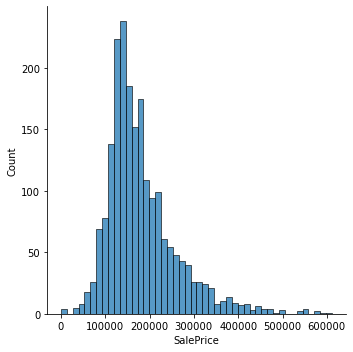

In [27]:
sns.displot(df['SalePrice']);
# Largely skewed to the left
# Seems that there are some possible outliers at the tail end of SalePrice

In [28]:
saleprice_99_percentile = np.quantile(df['SalePrice'],0.99)
saleprice_99_percentile

456173.5

In [29]:
# Drop column withh SalePrice = 0
df.drop(df.loc[df['SalePrice']==0].index, inplace=True)
# Remove Outliers - Dropping the houses with SalePrice > its 99th percentile
df = df[df['SalePrice']<=saleprice_99_percentile]
df.shape

(2028, 65)

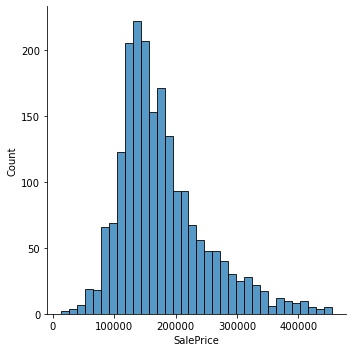

In [30]:
sns.displot(df['SalePrice']);
# Now our SalePrice looks less skewed -> more normally distributed

Before we dive deeper into the behaviour of features using Data visualization, we will create functions for plotting to overcome tediosity
- Scatter Plots (for Numerical Categories)
- Box Plots (for Categorial Categories)
- Count Plots (to see relative frequencies)

In [31]:
# Functions for scatter and box plots
def plot_scat(col1, fig_size):
    plt.figure(figsize=fig_size)
    plt.title(f"Scatter plot of {str(col1)} vs Sale Price")
    print(f'Correlation Coeff of {col1} and SalePrice: {round(np.corrcoef(df[col1], df["SalePrice"])[0][1],5)}')
    sns.scatterplot(x=col1, y='SalePrice', data=df);
    
def plot_box(col1, rot_title, fig_size):
    plt.figure(figsize=fig_size)
    plt.xticks(rotation=rot_title)
    plt.title(f"Sale Price of Houses by {str(col1)}")
    temp_df = df[[str(col1),'SalePrice']].sort_values(by='SalePrice', ascending=False)
    sns.boxplot(x=col1, y='SalePrice', data=temp_df);
    
        
def plot_count(col1, rot_title, fig_size):    
    plt.figure(figsize=fig_size)
    plt.xticks(rotation=rot_title)
    plt.title(f"Number of Houses Sold by {str(col1)}")
    temp_df = df[[str(col1),'SalePrice']].sort_values(by='SalePrice', ascending=False)
    sns.countplot(x=col1, data=temp_df);

<span style="color:royalblue"> **3f. High Cardinality Feature - Neighborhood**</span>
    
The neighborhood could be influencial to a home’s value, because it is responsible for both qualitative and quantifiable aspects of a home’s appeal. For example, school quality or crime rate in the neighborhood significantly affects home values.<br>
In our dataset, there are 29 different neighborhoods, and we can say that the neighborhood feature have high cardinality, which means there are many many of these unique values in a single column. We will expect One-Hot Encoding to be a problem in such a case if we have a separate column for each unique neighborhood. We will have too many unique values to model effectively, which can also lead to issues when training and testing our model. It’s possible that a neighborhood will show up in a test set, but not in the training set.

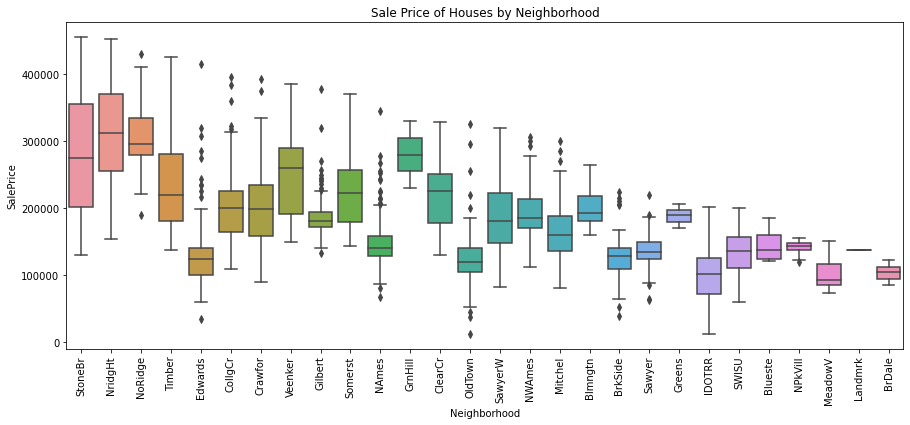

In [32]:
plot_box('Neighborhood', 90, (15,6))

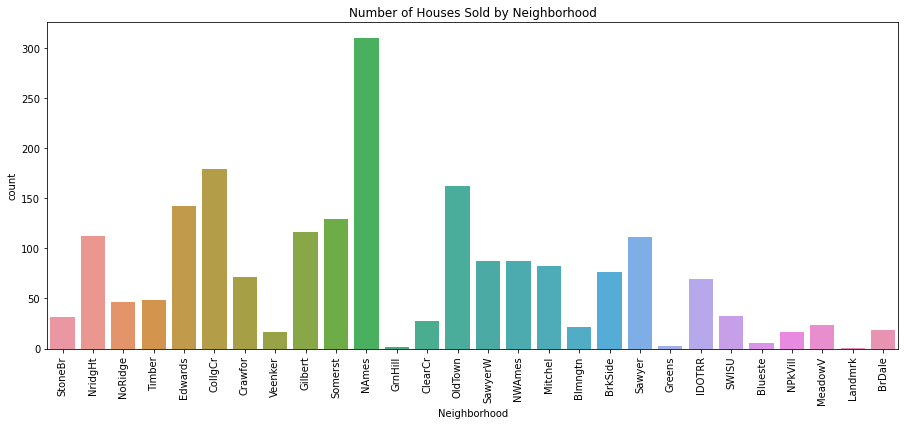

In [33]:
plot_count("Neighborhood", 90,(15.25,6))

In [34]:
# New data frame for Neighborhood, with -
# mean = based on mean SalePrice for that Neighborhood
# count = number of observations for that Neighborhood

df_neigh = df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'count'])
df_neigh.sort_values(by='mean',ascending=False).head(3)

,mean,count
Neighborhood,,
NridgHt,307264.750000,112
NoRidge,307198.217391,46
StoneBr,283938.774194,31


In [35]:
# Weak correlation coefficient between SalePrice and number of houses in the neighbourhood, 
# we will not take into account the number of houses in the neighbourhood
np.corrcoef(df_neigh["mean"], df_neigh["count"])[0][1]

-0.12113345780485558

In [36]:
# We want to group the 4 neighbourhood into 4 classes (neigh_class):

# Class A: above 75th
# Class B: above 50th percentile , 75th percentile & below
# Class C: above 25th percentile , 50th percentile & below
# Class D: 25th percentile & below

for i in df_neigh.index:
    if float(df_neigh[df_neigh.index == str(i)]["mean"]) > df_neigh['mean'].quantile(0.75):
        df_neigh.loc[str(i),"neigh_class"] = 'A'
    elif float(df_neigh[df_neigh.index == str(i)]["mean"]) <= df_neigh['mean'].quantile(0.25):
        df_neigh.loc[str(i),"neigh_class"] = 'D'
    elif float(df_neigh[df_neigh.index == str(i)]["mean"]) <= df_neigh['mean'].quantile(0.5):
        df_neigh.loc[str(i),"neigh_class"] = 'C'
    else:
        df_neigh.loc[str(i),"neigh_class"] = 'B'

df_neigh

,mean,count,neigh_class
Neighborhood,,,
Blmngtn,200417.681818,22,B
Blueste,144566.666667,6,C
BrDale,103371.052632,19,D
BrkSide,127022.697368,76,D
ClearCr,217490.074074,27,B
CollgCr,200974.854749,179,B
Crawfor,205901.211268,71,B
Edwards,130117.718310,142,D
Gilbert,189228.387931,116,B


In [37]:
neigh_class_col = []
for i in df["Neighborhood"]:
    j = df_neigh.loc[i,"neigh_class"]
    neigh_class_col.append(j)

# Adding neighborhood class as a new feature on our dataframe
df["neigh_class"] = neigh_class_col
df['neigh_class'].value_counts()

C    614
D    524
B    505
A    385
Name: neigh_class, dtype: int64

In [38]:
# Now that we have grouped neighborhood into classes, 
# we can now drop our original neighborhood feature from our dataframe
df.drop(labels="Neighborhood", axis=1, inplace=True)
df.shape

(2028, 65)

<span style="color:royalblue"> **3g. Lot Area and Log Config**</span><br>
Size is an important element to consider when predicting SalePrice, since a bigger house can positively impact its valuation.

Correlation Coeff of Lot Area and SalePrice: 0.27047


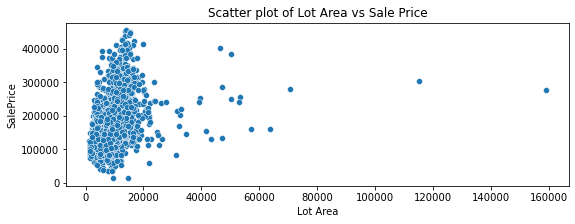

In [39]:
plot_scat('Lot Area', (9,3));

We can see that there are some outliers for Lot Area (i.e. houses that have extremely huge lot area but reasonalble SalePrice). We want to remove these outliers to improve our predictive model.

In [40]:
area_99_percentile = np.quantile(df['Lot Area'], q=0.99)
area_99_percentile

31629.60000000001

In [41]:
df[df['Lot Area']>area_99_percentile].shape[0]
# Remove Outliers - Dropping the houses with Lot Area > its 99th percentile area_99_percentile

21

In [42]:
df = df[df['Lot Area']<=area_99_percentile]
df.shape

(2007, 65)

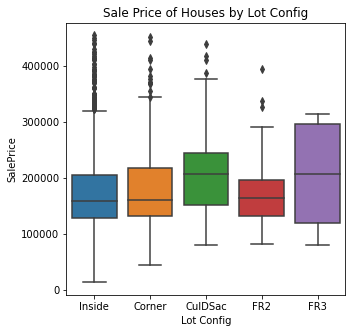

In [43]:
plot_box('Lot Config', 0, (5,5))

In [44]:
df.drop(labels=['Lot Config','Lot Area'], axis=1, inplace=True)
df.shape

(2007, 63)

As we can see from the boxplots above, we can draw the following conclusions -<br>
(i) Weak correlation between Lot Area and SalePrice <br>
(ii) No clear distinction for medians and ranges of Lot Config <br>
Based on (i) and (ii), no clear conclusions may be made $\implies$ we have dropped the columns for `Lot Area` and `Lot Shape` <br><br>
We want to do the same for **all** of the other columns.<br><br>
<span style="color:royalblue"> **3h. Dropping Features with Poor Relations**</span>



Correlation Coeff of Mas Vnr Area and SalePrice: 0.45961
Correlation Coeff of BsmtFin SF 1 and SalePrice: 0.42562
Correlation Coeff of BsmtFin SF 2 and SalePrice: -0.0013
Correlation Coeff of Bsmt Unf SF and SalePrice: 0.18933
Correlation Coeff of Total Bsmt SF and SalePrice: 0.64527
Correlation Coeff of 1st Flr SF and SalePrice: 0.62984
Correlation Coeff of 2nd Flr SF and SalePrice: 0.24989
Correlation Coeff of Gr Liv Area and SalePrice: 0.7049
Correlation Coeff of Garage Yr Blt and SalePrice: 0.27401
Correlation Coeff of Garage Area and SalePrice: 0.65206
Correlation Coeff of Wood Deck SF and SalePrice: 0.33188
Correlation Coeff of Open Porch SF and SalePrice: 0.33373
Correlation Coeff of Enclosed Porch and SalePrice: -0.133
Correlation Coeff of Screen Porch and SalePrice: 0.08681
Correlation Coeff of AgeSold and SalePrice: -0.59923
Correlation Coeff of AgeRemod and SalePrice: -0.57145


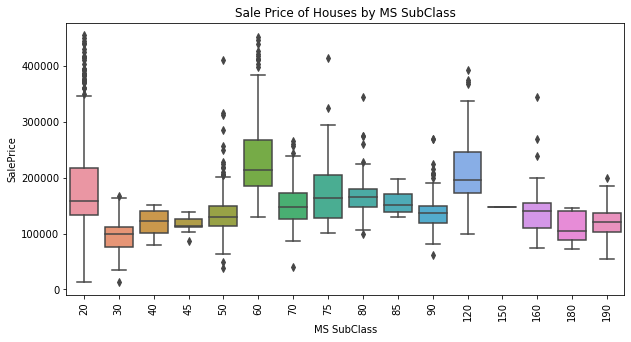

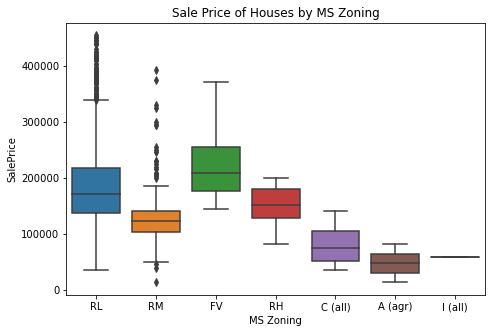

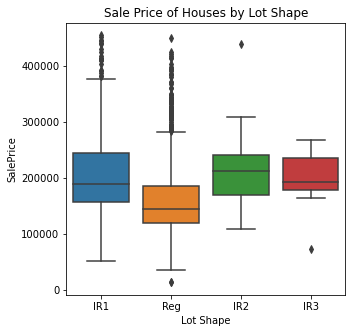

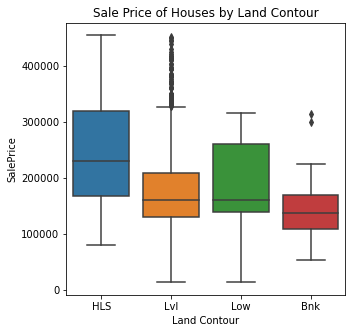

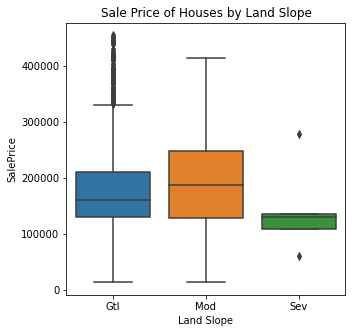

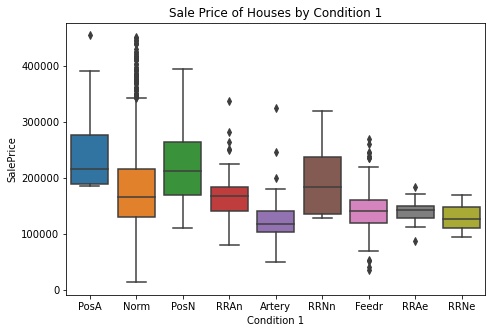

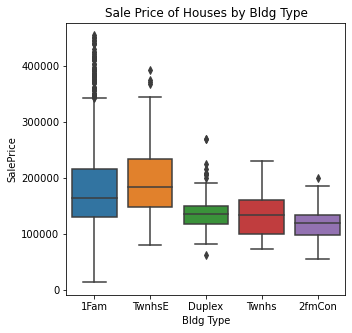

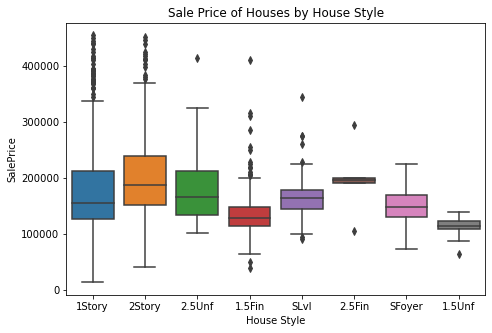

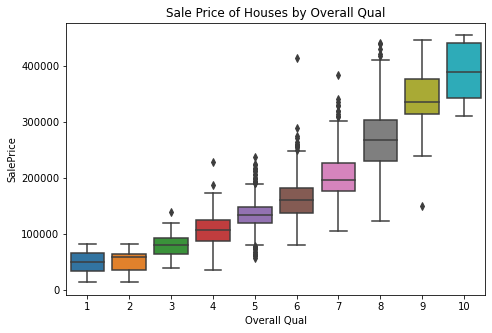

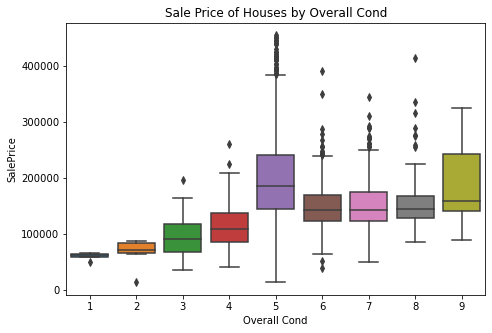

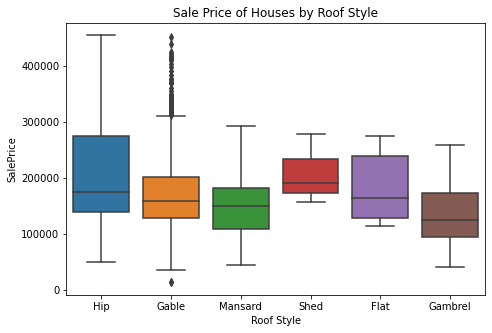

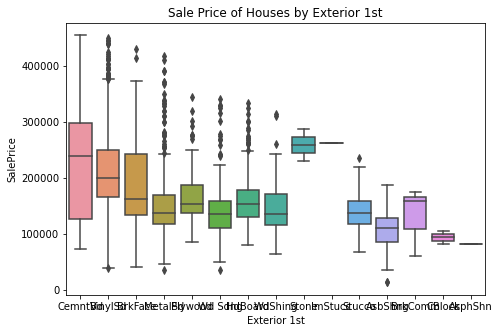

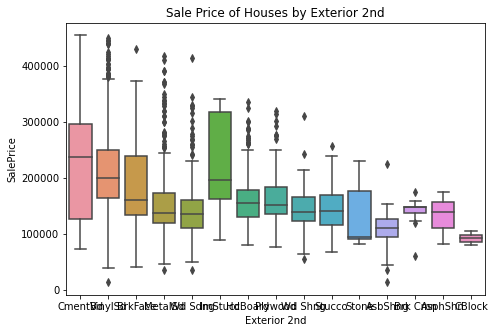

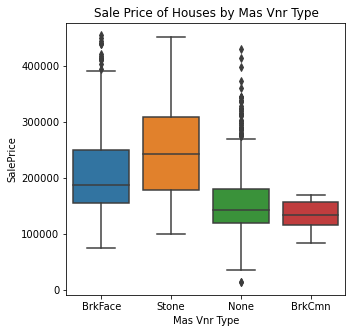

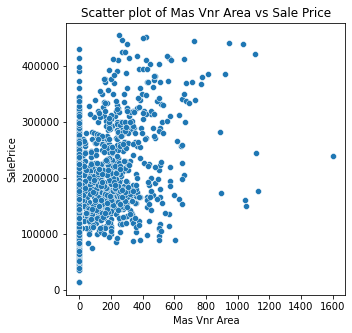

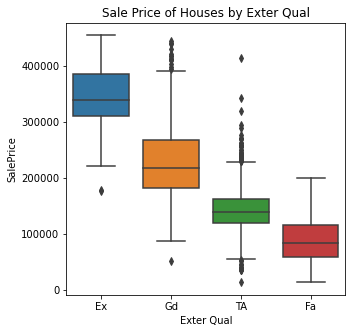

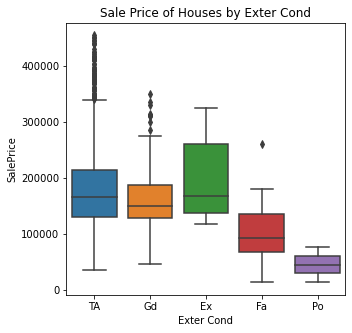

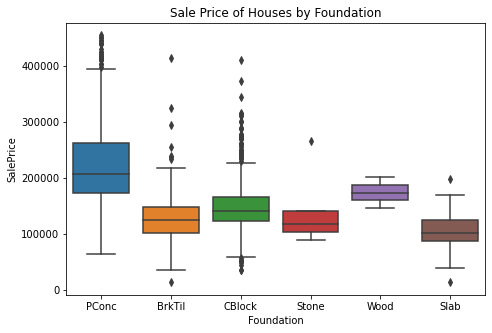

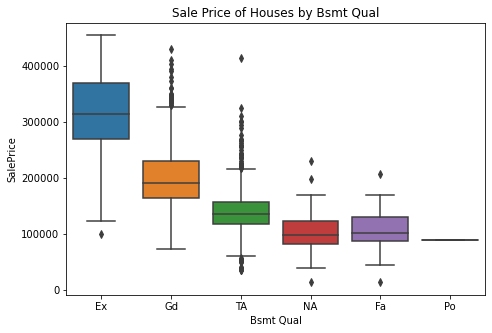

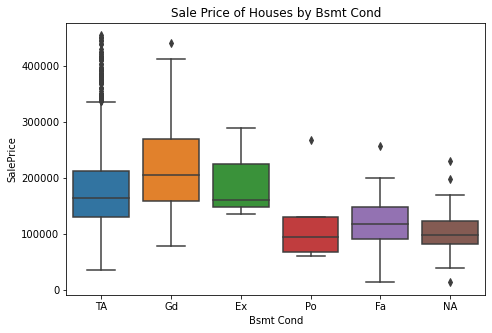

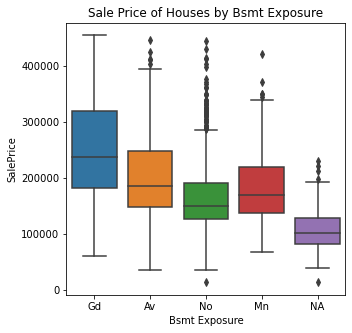

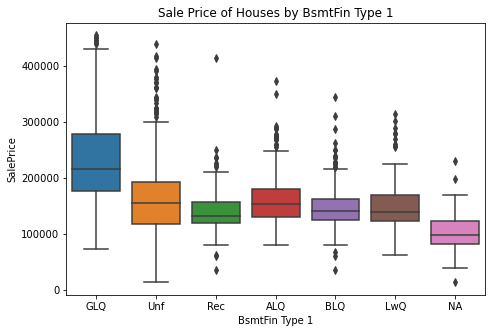

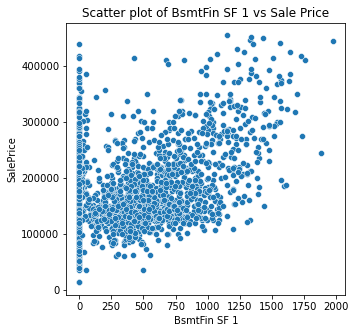

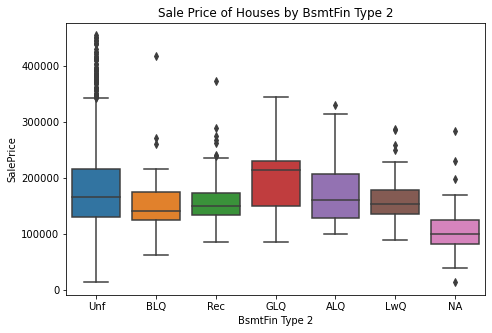

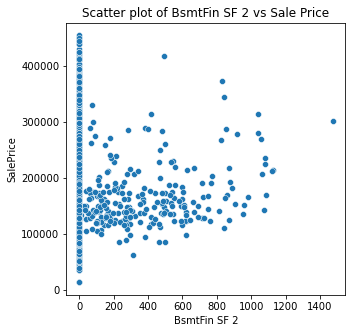

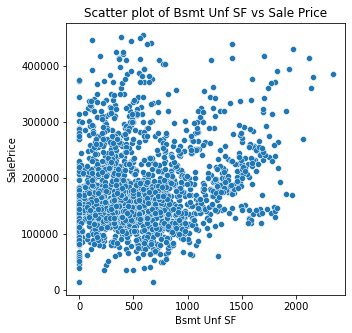

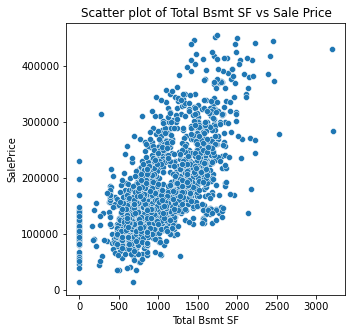

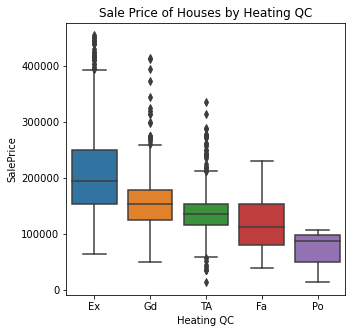

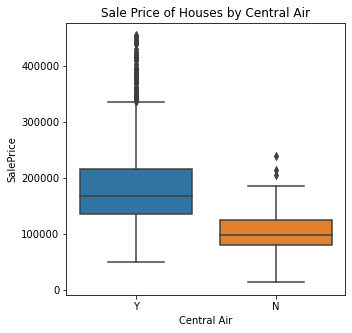

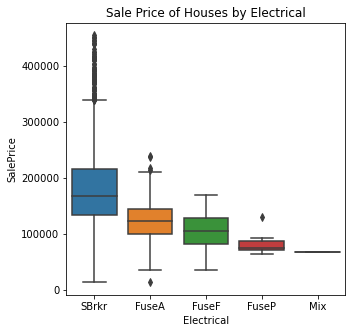

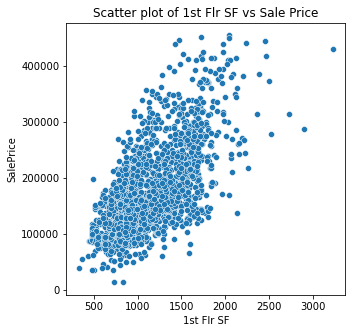

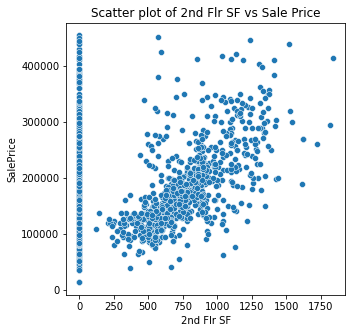

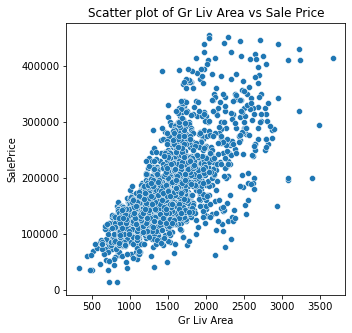

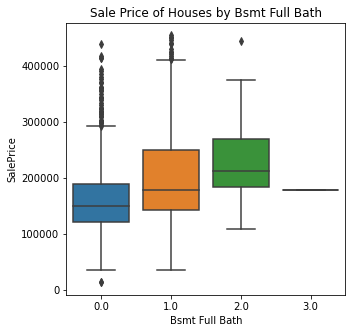

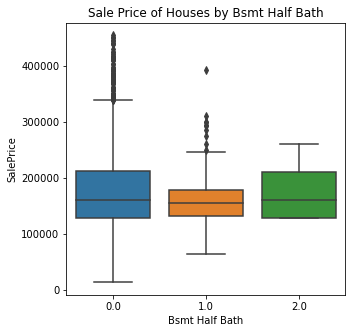

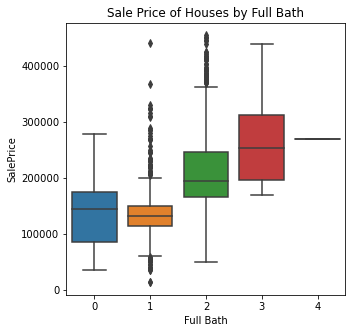

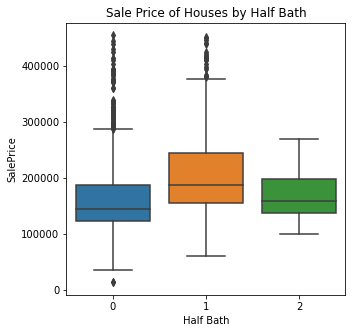

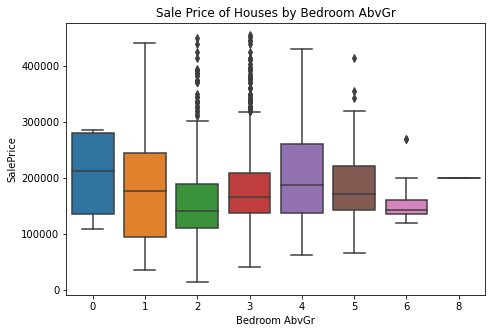

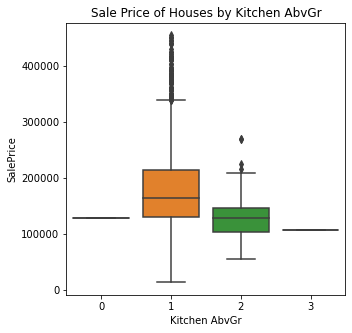

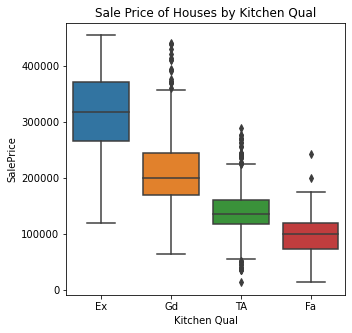

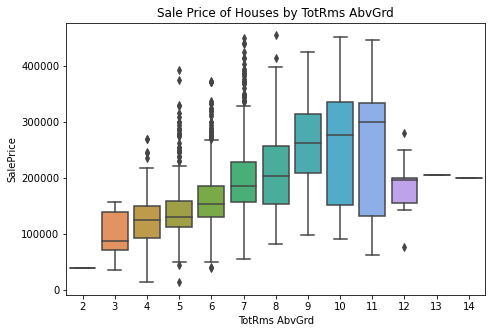

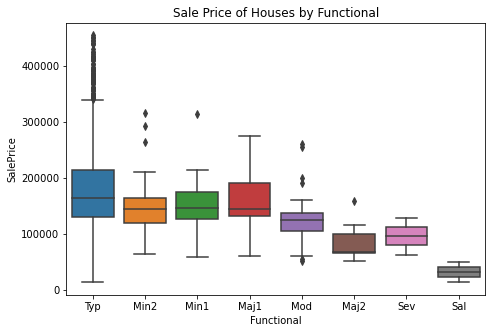

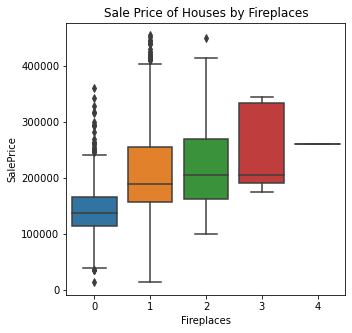

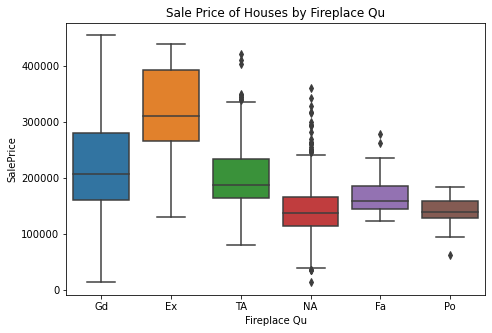

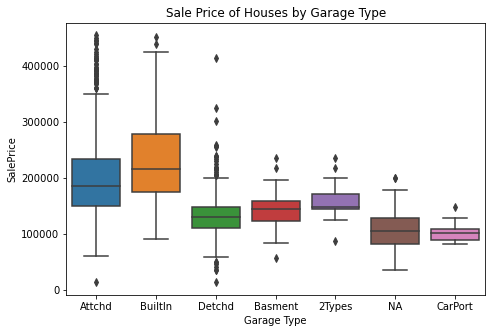

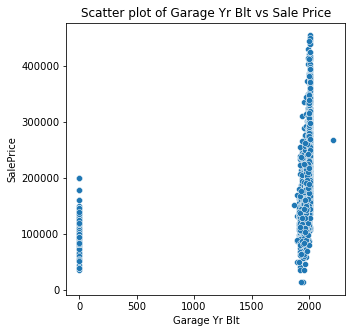

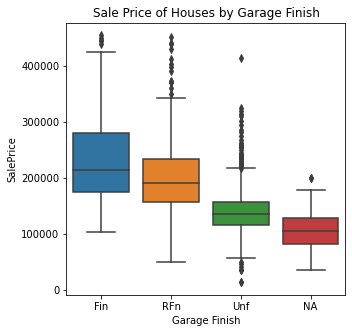

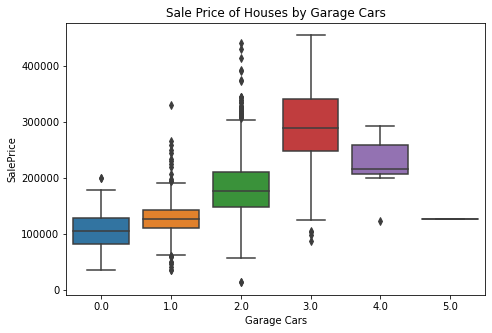

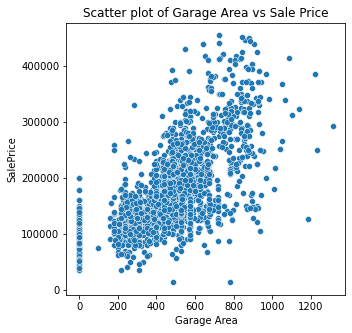

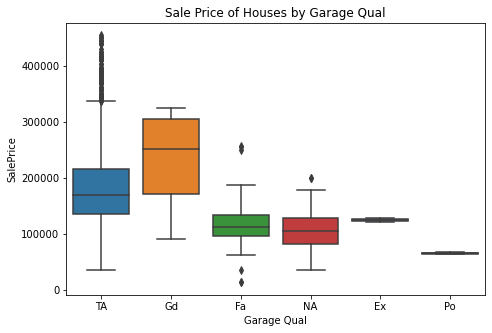

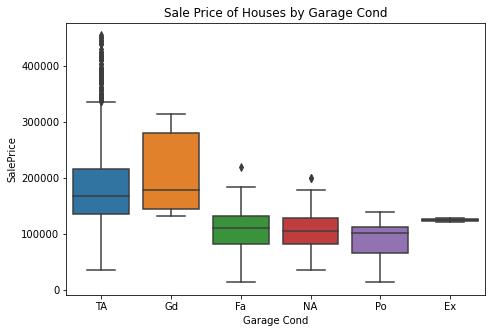

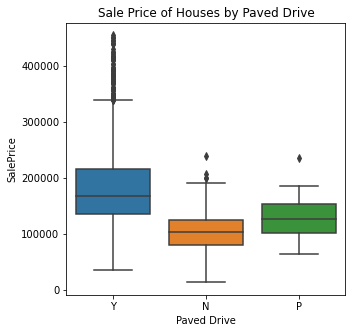

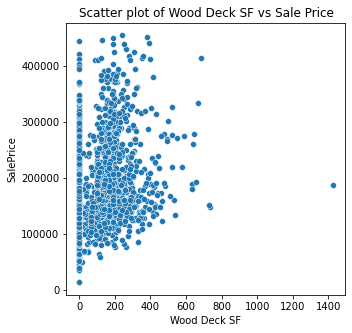

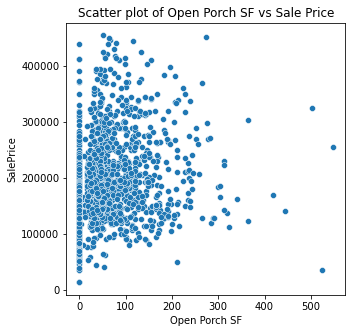

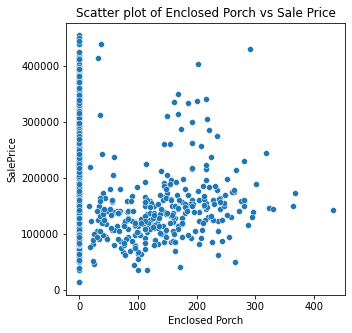

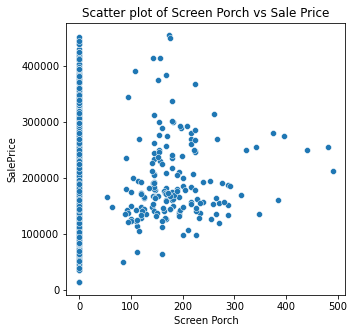

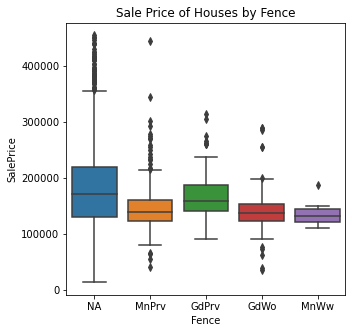

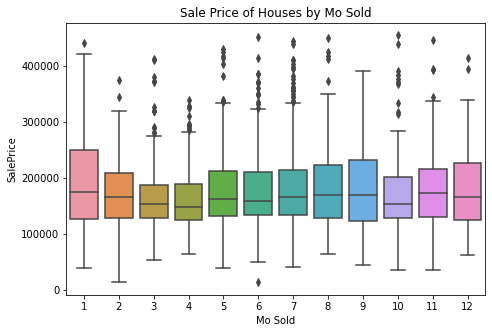

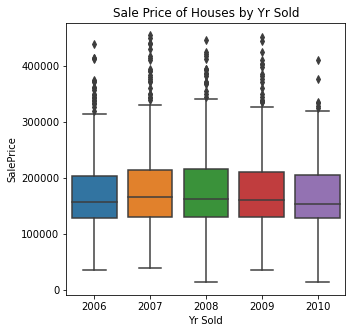

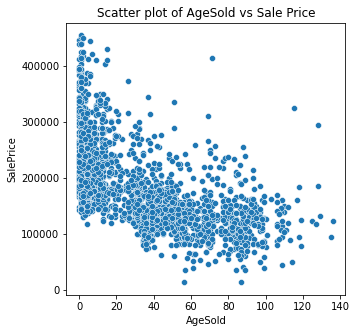

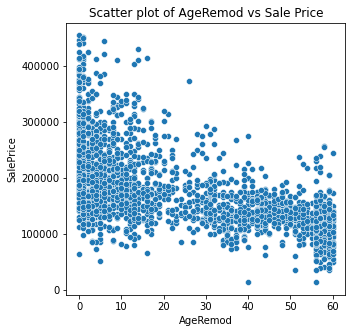

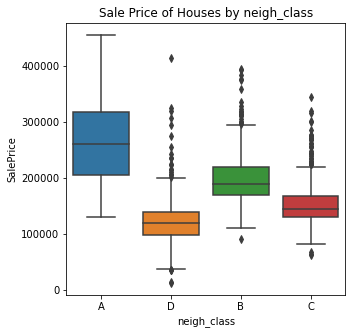

In [45]:
for i in df.drop('SalePrice',axis=1, inplace=False).columns:
    if df[i].dtype == float and df[i].nunique()>30:
        plot_scat(i, (5,5))
    elif df[i].dtype == int and df[i].nunique()>30:
        plot_scat(i, (5,5))
    elif df[i].nunique()<=5:
        plot_box(i, 0, (5,5))
    elif df[i].nunique()<=15:
        plot_box(i, 0, (7.5,5))
    else:
        plot_box(i, 90, (10,5))

From the plots above, for the boxplotted features that no clear distinction $\implies$ no clear conclusion may be made, so we will drop these columns

In [46]:
df.drop(labels=['Lot Shape','Land Slope','Bldg Type','Bsmt Full Bath','Half Bath',
                'Bedroom AbvGr','Kitchen AbvGr','Mo Sold','Yr Sold'], axis=1, inplace=True)
df.shape

(2007, 54)

For the numerical features that have poor correlation coefficient with sale price (i.e. $|r|<0.2$), we will drop these columns

In [47]:
# Printing all the correlation coefficient (w.r.t. SalePrice) for all the int/float columns
low_corr = []
for i in df.drop('SalePrice',axis=1, inplace=False).columns:
    if df[i].dtype == float and df[i].nunique()>30:
        print(i)
        print(np.corrcoef(df[i], df["SalePrice"])[0][1])
        if abs(np.corrcoef(df[i], df["SalePrice"])[0][1]) < 0.2:
            low_corr.append(i)
    elif df[i].dtype == int and df[i].nunique()>30:
        print(i)
        print(np.corrcoef(df[i], df["SalePrice"])[0][1])
        if abs(np.corrcoef(df[i], df["SalePrice"])[0][1]) < 0.2:
            low_corr.append(i)

Mas Vnr Area
0.4596072827940469
BsmtFin SF 1
0.425621246756944
BsmtFin SF 2
-0.0013041798231465712
Bsmt Unf SF
0.18932564521766346
Total Bsmt SF
0.6452678171111783
1st Flr SF
0.6298399695622788
2nd Flr SF
0.2498943591773295
Gr Liv Area
0.7049015061746868
Garage Yr Blt
0.27401480480498974
Garage Area
0.6520613149179677
Wood Deck SF
0.3318840723127988
Open Porch SF
0.3337278786244148
Enclosed Porch
-0.13299769841864448
Screen Porch
0.08680681810582996
AgeSold
-0.5992269048566324
AgeRemod
-0.5714487517285607


In [48]:
print(f'Features with poor correlation coefficient (|r|<0.2):\n {low_corr}')
# these int/float columns have poor correlation coefficient with sale price (<0.2), we will drop these columns
df.drop(labels=low_corr, axis=1, inplace=True)
df.shape

Features with poor correlation coefficient (|r|<0.2):
 ['BsmtFin SF 2', 'Bsmt Unf SF', 'Enclosed Porch', 'Screen Porch']


(2007, 50)

**Heatmap of Numerical Features Correlation with SalePrice**

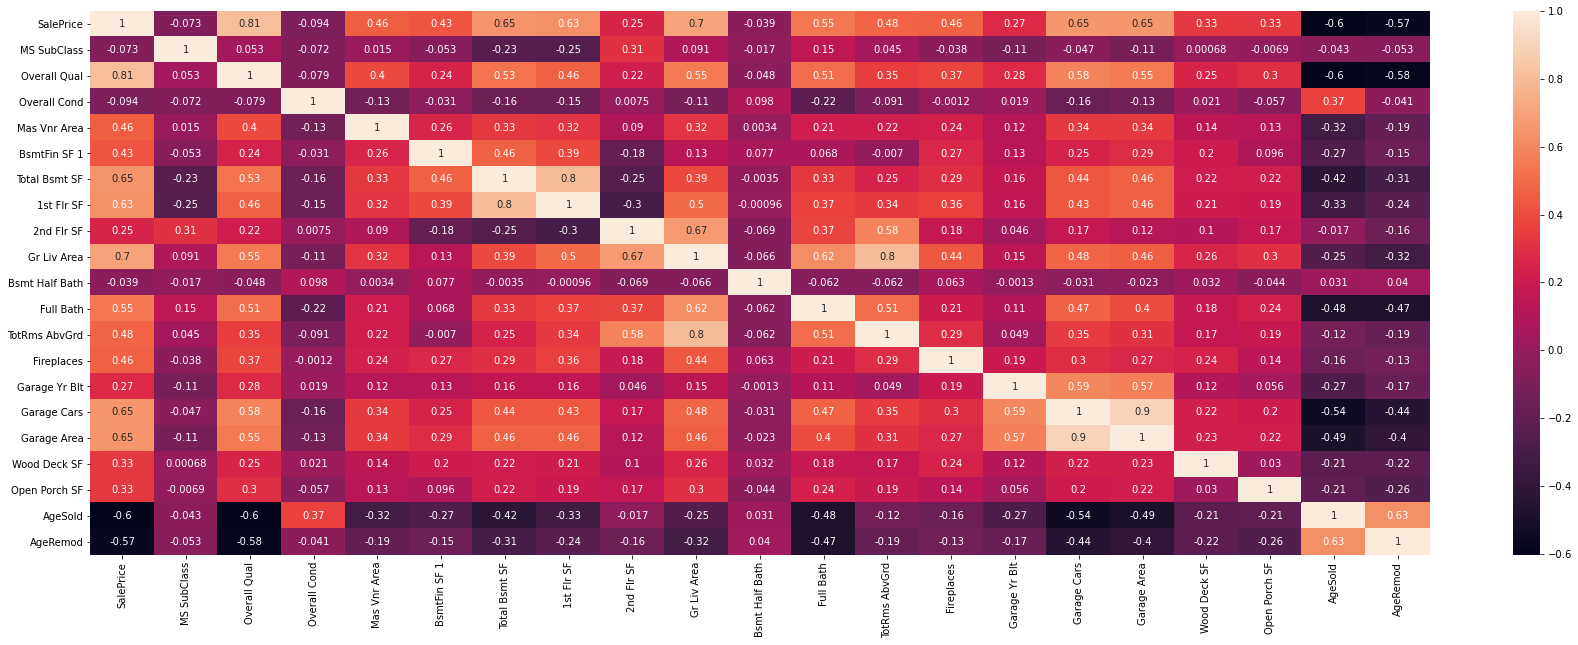

In [49]:
plt.figure(figsize=(30,10))
c = sns.heatmap(df.corr(), annot=True);

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,2007.0,177372.481814,71392.167541,12789.0,129100.0,160250.0,211000.0,455000.0
MS SubClass,2007.0,57.249626,42.781925,20.0,20.0,50.0,70.0,190.0
Overall Qual,2007.0,6.075735,1.387971,1.0,5.0,6.0,7.0,10.0
Overall Cond,2007.0,5.569008,1.107437,1.0,5.0,5.0,6.0,9.0
Mas Vnr Area,2007.0,93.087195,162.314804,0.0,0.0,0.0,151.5,1600.0
BsmtFin SF 1,2007.0,426.992028,426.385584,0.0,0.0,361.0,719.5,1972.0
Total Bsmt SF,2007.0,1039.385650,410.389361,0.0,788.0,988.0,1297.5,3206.0
1st Flr SF,2007.0,1145.521176,360.249424,334.0,875.0,1083.0,1375.0,3228.0
2nd Flr SF,2007.0,327.682611,421.570955,0.0,0.0,0.0,689.0,1836.0
Gr Liv Area,2007.0,1478.552566,466.692828,334.0,1124.0,1435.0,1718.0,3672.0


<span style="color:royalblue"> **3i. Dummifying nominal features (One-hot-encoding)**</span>

In [51]:
# forming a list of categorial columns with object values to dummify later
lst_cat = [i for i in df.columns if df[i].dtype == object]
# we also want to take into account categorial columns with integer/float values       
lst_cat.append('MS SubClass')

print(lst_cat)

['MS Zoning', 'Land Contour', 'Condition 1', 'House Style', 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Fence', 'neigh_class', 'MS SubClass']


In [52]:
# now that we have the list of categorial columns, we want to dummify categorial columns
dummy_df = pd.get_dummies(df,columns=lst_cat,drop_first=True)
df = pd.concat([df,dummy_df],axis=1)
df = df.loc[:,~df.columns.duplicated()]
df.shape

(2007, 215)

In [53]:
df.drop(labels=lst_cat, axis=1, inplace=True) # droping the columns that we have already dummify to avoid double countings
df.shape

(2007, 185)

In [54]:
df.head().T

Id,109,544,153,318,255
SalePrice,130500.0,220000.0,109000.0,174000.0,138500.0
Overall Qual,6.0,7.0,5.0,5.0,6.0
Overall Cond,8.0,5.0,7.0,5.0,8.0
Mas Vnr Area,289.0,132.0,0.0,0.0,0.0
BsmtFin SF 1,533.0,637.0,731.0,0.0,0.0
Total Bsmt SF,725.0,913.0,1057.0,384.0,676.0
1st Flr SF,725.0,913.0,1057.0,744.0,831.0
2nd Flr SF,754.0,1209.0,0.0,700.0,614.0
Gr Liv Area,1479.0,2122.0,1057.0,1444.0,1445.0
Bsmt Half Bath,0.0,0.0,0.0,0.0,0.0


### <span style="color:royalblue"> **4. Model Preparation**

#### <span style="color:royalblue"> **4a. Train/Test/Split**
    

In [55]:
X = df.drop(labels='SalePrice', axis=1, inplace=False)
y = df['SalePrice']

print(X.shape)
print(y.shape)

(2007, 184)
(2007,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1404, 184)
(603, 184)
(1404,)
(603,)


#### <span style="color:royalblue"> **4b. Scaling**

In [57]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [58]:
print(X_train.shape)
print(X_test.shape)

(1404, 184)
(603, 184)


#### <span style="color:royalblue"> **4c. Instantiate our Models**
We want to evaluate 3 models: `LinearRegression`, `LassoCV` and `RidgeCV`, and use the one yields the best model metric

In [59]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(0.1, 10, 100))
enet = ElasticNetCV(alphas=np.arange(0.5, 1.0, 0.005), l1_ratio=0.5, cv=5)

#### <span style="color:royalblue"> **4d. Cross Validation**

In [60]:
# we want to find out the optimal number of folds 
for i in range(2,6):
    lr_scores = cross_val_score(lr, X_train, y_train, cv=i)
    lasso_scores = cross_val_score(lasso, X_train, y_train, cv=i)
    ridge_scores = cross_val_score(ridge, X_train, y_train, cv=i)
    enet_scores = cross_val_score(enet, X_train, y_train, cv=i)
    print(f'LinearRegression r2 score for {i}-fold validations: {lr_scores.mean()}')
    print(f'Lasso r2 score for {i}-fold validations: {lasso_scores.mean()}')
    print(f'Ridge r2 score for {i}-fold validations: {ridge_scores.mean()}')
    print(f'ElasticNet r2 score for {i}-fold validations: {enet_scores.mean()}')
    print('\n')

LinearRegression r2 score for 2-fold validations: -5.856046535056455e+21
Lasso r2 score for 2-fold validations: 0.9071939713490764
Ridge r2 score for 2-fold validations: 0.8978633688631328
ElasticNet r2 score for 2-fold validations: 0.8923758891969489


LinearRegression r2 score for 3-fold validations: -3.6288871569297393e+22
Lasso r2 score for 3-fold validations: 0.9068249314575211
Ridge r2 score for 3-fold validations: 0.9019601337831343
ElasticNet r2 score for 3-fold validations: 0.8969489558552626


LinearRegression r2 score for 4-fold validations: -7.991264935370054e+24
Lasso r2 score for 4-fold validations: 0.9086819994833333
Ridge r2 score for 4-fold validations: 0.9055934059435966
ElasticNet r2 score for 4-fold validations: 0.8976077953554458


LinearRegression r2 score for 5-fold validations: -7.359914726086985e+21
Lasso r2 score for 5-fold validations: 0.9072977858043124
Ridge r2 score for 5-fold validations: 0.9038722196383386
ElasticNet r2 score for 5-fold validations: 0.89

Based on the average $𝑅^2$ from across cross-validation evaluations, $cv=3$ gives the best $𝑅^2$ score, and we can conclude that 3-fold cross validations is optimal.<br>
Comparing $𝑅^2$ between the different regression models with 3-fold cross validations on the training dataset - <br>
- `LinearRegression` Mean $𝑅^2$  Score: $--3.63 \times 10^{22}$<br>
- `RidgeCV` Mean $𝑅^2$  Score: 0.907<br>
- `LassoCV` Mean $𝑅^2$  Score: 0.902<br>
- `ElasticNetCV` Mean $𝑅^2$  Score: 0.897<br>


`LassoCV` have the best $𝑅^2$ Mean Score, we conclude that out of the 3 models, `Lasso` is the most suitable model for the training data 

#### <span style="color:royalblue"> **4e. Model Fitting**

In [61]:
# based on the average r^2 from across cv evaluations, we can conclude that cv=3 gives the best r2 score
lasso = LassoCV(n_alphas=200)
lasso.fit(X_train, y_train)

LassoCV(n_alphas=200)

In [62]:
best_lasso_alpha = lasso.alpha_
best_lasso_alpha

233.86504523366494

In [63]:
lasso = Lasso(alpha=best_lasso_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=233.86504523366494)

In [64]:
lasso.fit(X_train, y_train)
# making predictions on testing set
y_pred = lasso.predict(X_test)
# comparing r2 score of model predicted y values vs true y values:
r2_score(y_test, y_pred)

0.9183432213686177

In [65]:
print(f' Lasso R2 scoring fit model on training set: {lasso.score(X_train, y_train)}')
print(f' Lasso R2 scoring fit model on testing set: {lasso.score(X_test, y_test)}')
# Lasso model has lower bias

 Lasso R2 scoring fit model on training set: 0.9284252134070186
 Lasso R2 scoring fit model on testing set: 0.9183432213686177


In [66]:
print(f' Lasso model RMSE on training set: {np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))}')
print(f' Lasso model RMSE on testing set: {np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))}')

 Lasso model RMSE on training set: 18761.359886494116
 Lasso model RMSE on testing set: 21195.74325903807


Our model's R2 score is close to 0.918 on our test data , which means our model explains around 91.8% of the variation of our test data's SalePrice. Since the training score (0.928) is only alightly higher than our testing score (0.918), there is little evidence of overfitting. We can agree that this is a decent model.

#### <span style="color:royalblue"> **4f. Model Evaluation**

In [67]:
lasso.coef_ # getting the regression coefficients for features (X) used in modeling

array([ 1.13696975e+04,  5.59847807e+03,  2.93913182e+03,  7.78418894e+03,
        7.00557539e+03,  1.75675550e+03,  0.00000000e+00,  2.26069667e+04,
       -4.29000746e+02, -0.00000000e+00, -0.00000000e+00,  3.14511161e+03,
       -1.76010780e+03,  1.00963789e+03,  6.15911242e+03,  1.26732174e+03,
        1.45736304e+03, -9.93835391e+03, -2.30239701e+03, -2.72853318e+01,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.18811602e+03,
       -2.01270675e+02,  1.41728724e+03,  0.00000000e+00, -1.72029104e+02,
        0.00000000e+00,  2.41031414e+03,  6.01525331e+02,  1.13136715e+03,
       -2.07157345e+02,  0.00000000e+00, -0.00000000e+00, -6.80746052e+02,
       -0.00000000e+00,  0.00000000e+00, -1.19469226e+03,  4.49234631e+02,
       -1.37797097e+02,  3.56240806e+01, -1.14468009e+03, -0.00000000e+00,
       -3.21073662e+02,  2.96265688e+02, -2.15562241e+03, -0.00000000e+00,
        0.00000000e+00, -7.74680262e+02,  3.76377205e+03,  0.00000000e+00,
        0.00000000e+00, -

In [68]:
model_coeffs = {col:coeff for col, coeff in zip(X.columns, lasso.coef_)}
model_coeffs

{'Overall Qual': 11369.697510922766,
 'Overall Cond': 5598.478071263269,
 'Mas Vnr Area': 2939.1318204435506,
 'BsmtFin SF 1': 7784.188938753002,
 'Total Bsmt SF': 7005.575392989048,
 '1st Flr SF': 1756.755497237736,
 '2nd Flr SF': 0.0,
 'Gr Liv Area': 22606.966713073783,
 'Bsmt Half Bath': -429.00074619495064,
 'Full Bath': -0.0,
 'TotRms AbvGrd': -0.0,
 'Fireplaces': 3145.1116113614353,
 'Garage Yr Blt': -1760.1077964516323,
 'Garage Cars': 1009.6378931711929,
 'Garage Area': 6159.112421388626,
 'Wood Deck SF': 1267.3217384645657,
 'Open Porch SF': 1457.3630399787469,
 'AgeSold': -9938.35391232048,
 'AgeRemod': -2302.3970074668377,
 'MS Zoning_C (all)': -27.2853318320293,
 'MS Zoning_FV': 0.0,
 'MS Zoning_I (all)': 0.0,
 'MS Zoning_RH': -0.0,
 'MS Zoning_RL': 2188.116021059092,
 'MS Zoning_RM': -201.27067499716046,
 'Land Contour_HLS': 1417.287244549282,
 'Land Contour_Low': 0.0,
 'Land Contour_Lvl': -172.02910360109962,
 'Condition 1_Feedr': 0.0,
 'Condition 1_Norm': 2410.3141437012

In [69]:
model_coeffs_df = pd.DataFrame(model_coeffs, index=['coefficient']).T
model_coeffs_df = model_coeffs_df.sort_values(by=['coefficient'], ascending=False)
display(model_coeffs_df.head(10), model_coeffs_df.tail(10))

,coefficient
Gr Liv Area,22606.966713
Overall Qual,11369.697511
BsmtFin SF 1,7784.188939
Total Bsmt SF,7005.575393
Garage Area,6159.112421
Overall Cond,5598.478071
Functional_Typ,4505.708224
Exterior 1st_BrkFace,3763.772048
Fireplaces,3145.111611
Bsmt Exposure_Gd,2968.125223


,coefficient
neigh_class_B,-5822.051955
Exter Qual_Gd,-6219.993016
Bsmt Qual_TA,-6340.998997
neigh_class_C,-7851.161401
Bsmt Qual_Gd,-8220.944984
neigh_class_D,-8401.679585
Kitchen Qual_Gd,-8927.183740
Kitchen Qual_TA,-9727.196368
Exter Qual_TA,-9857.938280
AgeSold,-9938.353912


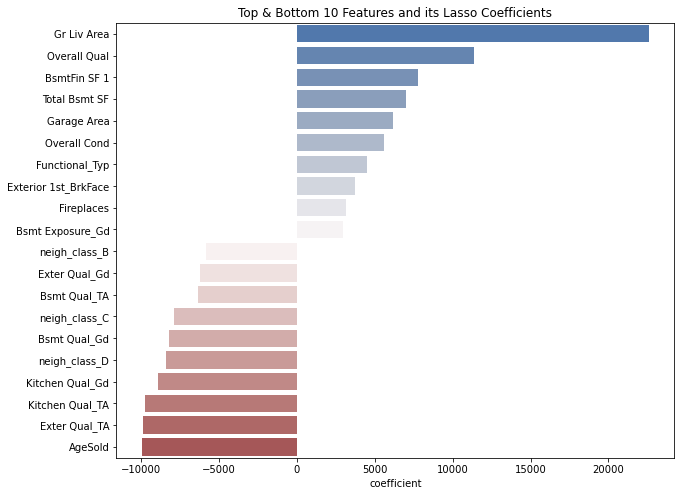

In [70]:
model_coeffs_df_truncate = pd.concat([model_coeffs_df.head(10), model_coeffs_df.tail(10)])
plt.figure(figsize=(10,8))
sns.barplot(data=model_coeffs_df_truncate, y=model_coeffs_df_truncate.index, x='coefficient', orient='h', palette="vlag")
plt.title('Top & Bottom 10 Features and its Lasso Coefficients');

#### <span style="color:royalblue"> **4g. Testing Linearity Assumptions**

In [71]:
y_residuals = y_test - y_pred

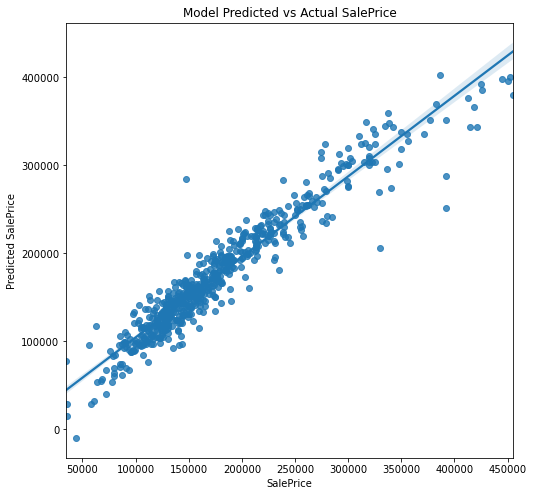

In [72]:
plt.figure(figsize = (8,8))
plt.title('Model Predicted vs Actual SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
sns.regplot(x=y_test,y=y_pred);

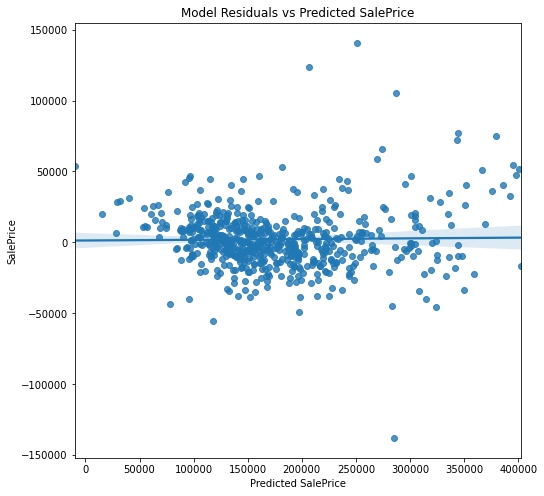

In [73]:
plt.figure(figsize = (8,8))
plt.title('Model Residuals vs Predicted SalePrice')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
sns.regplot(x=y_pred, y=y_residuals);

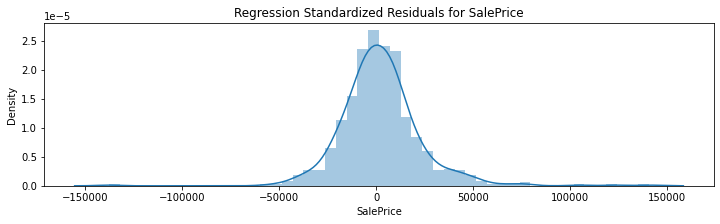

In [74]:
plt.figure(figsize = (12,3))
plt.title('Regression Standardized Residuals for SalePrice')

sns.distplot(y_residuals, bins = 50);

While the skew value indicates a considerable amount of right skewness, there appears to be no discernible pattern in the residuals. Hence, we can consider the (LINE) assumptions satisfied.

### <span style="color:royalblue"> **5. Conclusions**
#### <span style="color:royalblue"> **5a. In comparison with our Baseline Model**
    
The Lasso model we have designed made a significant improvement as compared to the Baseline Model:


| Model: | Baseline | Lasso |
| --- | --- | --- | 
| $R^2 $ score | 0.840 | 0.9183 |
| RMSE | 31609 | 21195 |


This addresses our problem statement of building a model to accurately predict housing prices.


#### <span style="color:royalblue"> **5b. Recommendations**

Perhaps, knowing the factors that will influence the house price may more valuable than the price predictions.
    
10 unique house features might be **positively correlated** with our house prices:
    
- Above Grade (ground) Living Area (square feet)
- Overall Quality 
- Basement (Type 1) Finished Area (square feet)
- Garage Area
- Overall Condition
- Typical Functionality 
- Brick Face Exterior Covering on house
- Number of Fireplaces
- Good Basement Exposure

We found that the top 3 features positively correlated with SalePrice are Ground Living Area, Overall Quality, as well as Basement Finished Area. In other words, these features, when present in greater magnitude, are likely to produce higher SalePrice. For example, a house with a higher Overall Quality would likely fetch a higher price than a house with a lower overall Quality. 

Homeowners may be more inclined to improve on the housing features that are generally amenable. E.g.:

- Select a better material and finish of the house to improve Overall Quality
- Basement (Type 1) Finished Area (square feet)
- Have a larger garage space (area)
    

5 unique house features might be **negatively correlated** with our house prices:
- AgeSold (in Years)
- External Quality Material: Average/Typical
- Kitchen Quality: Average/Typical
- Kitchen Quality: Good
- Class D Neighborhood

In other words, according to the observations drawn from the dataset, houses with such features are likely to fetch lower prices. 

While Age and Class D Neighborhood are unsurprising, the External Quality & Kitchen Quality are somewhat unusual. It is plausible that Ames’ citizens (for some reason) emphasize greatly on the house’s exterior material and kitchens, the category of Average/Typical is not expected. This implies that even houses with poor Exterior material or kitchen quality might somehow fetch higher prices than houses with average exterior material or kitchen, which does not make logical sense. A possible reason for this phenomenon could be that given the small size of our dataset (which only has slightly more than 2k+ houses), we do not have sufficient data points in the other categories to verify the correlation.

Two-cents worth for homebuyers:

- Avoid old houses in class D neighborhoods
- Buy houses that are built not too long ago, since prices deteriorate with age



#### <span style="color:royalblue"> **5c. Model Caveats**


Sensitive to context; Our model is unlikely to be generalizable to other cities. The features we chose to build the model might not be the most ideal selection to determine house prices, because we did not have enough domain knowledge to perform manual feature selection.  In reality, two populations in different cities or countries may not share the same considerations for desirable features in a house. 

To make the model more generalizable, we could cut down on the number of variables and use only general features found and assessed within most houses in the world, such as distance to a transport system. This would of course come at an expense of the predictive power of the model.


#### <span style="color:royalblue"> **5d. Possible Enhancements**
 
- Testing other predictive models such as random forest, support vector machines, since we are limited to only linear  regression here
- Obtaining more housing data, preferably recent, to update the model and expose it to more variations
- Obtaining more general features of the house such as crime rate, ethnicity, distance to amenities or facilities


### <span style="color:royalblue"> **Annex (Kaggle Submission)**

In [75]:
test_df.set_index('Id', inplace=True)
print(test_df.shape)

(878, 79)


In [76]:
test_df.head().T

Id,2658,2718,2414,1989,625
PID,902301120,905108090,528218130,902207150,535105100
MS SubClass,190,90,60,30,20
MS Zoning,RM,RL,RL,RM,RL
Lot Frontage,69.0,NaN,58.0,60.0,NaN
Lot Area,9142,9662,17104,8520,9500
Street,Pave,Pave,Pave,Pave,Pave
Alley,Grvl,NaN,NaN,NaN,NaN
Lot Shape,Reg,IR1,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [77]:
# Data cleaning all in one function 

def clean_test_set(data):
    
    data['AgeSold'] = data['Yr Sold'] - data['Year Built']
    data['AgeRemod'] = data['Yr Sold'] - data['Year Remod/Add']
    data[data['AgeSold']<0] = 0
    data[data['AgeRemod']<0] = 0
    data.drop(labels=['Year Built','Year Remod/Add'], axis=1, inplace=True)

    for i in data.columns:
        if data[i].dtypes == object:
            data[i].replace(np.nan, "NA",inplace=True)
    
    data['Bsmt Qual'] = data['Bsmt Qual'].fillna('NA')
    data.loc[data['Bsmt Qual']=='NA','Bsmt Full Bath'] = 0
    data.loc[data['Bsmt Qual']=='NA','Bsmt Half Bath'] = 0
    data.loc[data['Bsmt Qual']=='NA','BsmtFin SF 1'] = 0
    data.loc[data['Bsmt Qual']=='NA','BsmtFin SF 2'] = 0
    data.loc[data['Bsmt Qual']=='NA','Bsmt Unf SF'] = 0
    data.loc[data['Bsmt Qual']=='NA','Total Bsmt SF'] = 0

    data.loc[data['Garage Finish']=='NA','Garage Yr Blt'] = 0
    
    test_gar = data.filter(regex= 'Garage')
    test_gar_null = test_gar[test_gar['Garage Area'].isnull()]
    
    for i in list(test_gar_null.index):
        data.loc[i , 'Garage Yr Blt'] = round(df_gar['Garage Yr Blt'].mean(),0)
        data.loc[i , 'Garage Cars'] = round(df_gar['Garage Cars'].mean(),0)
        data.loc[i , 'Garage Area'] = round(df_gar['Garage Area'].mean(),0)
        data.loc[i , 'Garage Finish'] = df_gar['Garage Finish'].mode()[0]
        data.loc[i , 'Garage Qual'] = df_gar['Garage Qual'].mode()[0]
        data.loc[i , 'Garage Cond'] = df_gar['Garage Cond'].mode()[0]
        
    data['Mas Vnr Type'].replace('NA',None, inplace=True) 
    data.loc[(data['Mas Vnr Type']=='BrkFace') & (data['Mas Vnr Area'].isnull()),'Mas Vnr Area'] = mean_mas_vnr_brk
    data.loc[(data['Mas Vnr Type']=='Stone') & (data['Mas Vnr Area'].isnull()),'Mas Vnr Area'] = mean_mas_vnr_stone
    
    neigh_class_col = []
    for i in data["Neighborhood"]:
        j = df_neigh.loc[i,"neigh_class"]
        neigh_class_col.append(j)
    
    data["neigh_class"] = neigh_class_col
    
    
    data.drop(['Neighborhood','PID', 'Sale Type','Lot Frontage','Street','Alley','Utilities', 'Condition 2', 'Roof Matl',
         'Low Qual Fin SF', 'Heating', 'Pool QC', 'Pool Area', 'Misc Feature','Misc Val', '3Ssn Porch','Lot Config',
         'Lot Shape','Land Slope','Bldg Type','Bsmt Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr',
         'Misc Val','Mo Sold','Yr Sold','BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', '2nd Flr SF', 
         'Garage Yr Blt', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch'], axis=1, inplace=True)

    
    dummy_df = pd.get_dummies(data,columns=lst_cat, drop_first=True)
    data = pd.concat([data,dummy_df],axis=1)
    data = data.loc[:,~data.columns.duplicated()]
    data.drop(labels=lst_cat, axis=1, inplace=True)
    
    print(data.shape)
    return data

In [78]:
test_df  = clean_test_set(test_df)

(878, 173)


In [79]:
test_df.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Bsmt Half Bath',
       'Full Bath', 'TotRms AbvGrd',
       ...
       'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_75', 'MS SubClass_80',
       'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120',
       'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_190'],
      dtype='object', length=173)

In [80]:
test_df.head().T

Id,2658,2718,2414,1989,625
Lot Area,9142.0,9662.0,17104.0,8520.0,9500.0
Overall Qual,6.0,5.0,7.0,5.0,6.0
Overall Cond,8.0,4.0,5.0,6.0,5.0
Mas Vnr Area,0.0,0.0,0.0,0.0,247.0
Total Bsmt SF,1020.0,1967.0,654.0,968.0,1394.0
1st Flr SF,908.0,1967.0,664.0,968.0,1394.0
Gr Liv Area,1928.0,1967.0,1496.0,968.0,1394.0
Bsmt Half Bath,0.0,0.0,0.0,0.0,0.0
Full Bath,2.0,2.0,2.0,1.0,1.0
TotRms AbvGrd,9.0,10.0,7.0,5.0,6.0


In [81]:
# Columns in test but not in train
not_in_train = []
for i in test_df.columns:
    if i not in df.columns:
        not_in_train.append(i)
print(not_in_train)
#we want to drop these columns
test_df.drop(labels = not_in_train, axis=1, inplace=True)
test_df.shape

['Lot Area', 'Exterior 1st_PreCast', 'Exterior 2nd_Other', 'Exterior 2nd_PreCast', 'Mas Vnr Type_CBlock', 'Electrical_NA', 'Kitchen Qual_Po']


(878, 166)

In [82]:
df.columns

Index(['SalePrice', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Half Bath',
       ...
       'MS SubClass_70', 'MS SubClass_75', 'MS SubClass_80', 'MS SubClass_85',
       'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_150',
       'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_190'],
      dtype='object', length=185)

In [83]:
# Columns in train but not in test
not_in_test = []
for i in df.drop(labels='SalePrice',axis=1,inplace=False).columns:
    if i not in test_df.columns:
        not_in_test.append(i)
        
print(not_in_test)

#we want to add these missing columns into our test and assign value 0
for j in not_in_test:
    test_df[j] = 0
test_df.shape

['BsmtFin SF 1', '2nd Flr SF', 'Garage Yr Blt', 'Wood Deck SF', 'Open Porch SF', 'MS Zoning_C (all)', 'Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_Stone', 'Exterior 2nd_Stone', 'Bsmt Cond_Fa', 'Bsmt Cond_Po', 'Heating QC_Po', 'Electrical_Mix', 'Functional_Sal', 'Functional_Sev', 'Garage Qual_Fa', 'MS SubClass_150']


(878, 184)

In [84]:
scale_test = ss.transform(test_df)
pred_test_y = lasso.predict(scale_test)
test_df['SalePrice'] = pred_test_y

In [85]:
sp_col = test_df.pop("SalePrice")
test_df.insert(0, 'SalePrice', sp_col)
test_df.reset_index(inplace=True)
test_df.head(3)

,Id,SalePrice,Overall Qual,Overall Cond,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Bsmt Half Bath,Full Bath,...,Exterior 1st_Stone,Exterior 2nd_Stone,Bsmt Cond_Fa,Bsmt Cond_Po,Heating QC_Po,Electrical_Mix,Functional_Sal,Functional_Sev,Garage Qual_Fa,MS SubClass_150
0,2658,2.274325e+06,6,8,0.0,1020,908,1928,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2718,2.948032e+06,5,4,0.0,1967,1967,1967,0,2,...,0,0,0,0,0,0,0,0,0,0
2,2414,2.188402e+06,7,5,0.0,654,664,1496,0,2,...,0,0,0,0,0,0,0,0,0,0


In [86]:
kaggle_df = test_df[['Id','SalePrice']]
kaggle_df.head()

,Id,SalePrice
0,2658,2.274325e+06
1,2718,2.948032e+06
2,2414,2.188402e+06
3,1989,2.421464e+06
4,625,2.661677e+06


In [87]:
kaggle_df.to_csv('./datasets/kaggle_submission.csv', index=False)

*Thank you!*